In [1574]:
## Imports
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Draw inline
%matplotlib inline

# Set figure aesthetics
plt.style.use('ggplot')
sns.set_style({'ytick.major.size': 10.0})
sns.set_context("talk", font_scale=1.0)


In [1362]:
colors = ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']

In [1575]:
start = pd.datetime(2013,4,21)
end = pd.datetime(2013,5,5)
semester_end = '2013-06-01'

In [54]:
import json
from pandas.io.json import json_normalize

data = json.load((open('G:\Datasets\StudentLife\dataset\EMA\EMA_definition.json')))

#### Read in EMA Question Definitions

In [159]:
EMA_definitions = json_normalize(data,'questions',['name'])
EMA_definitions[EMA_definitions['name']=='Exercise']

,options,question_id,question_text,name
31,(Yes) 1 2 (No),have,Did you do vigorous exercise today (don't incl...,Exercise
32,(Yes) 1 2 (No),schedule,If no did you want to but couldn't because of ...,Exercise
33,"[1]None, [2]<30 mins, [3]30-60 mins, [4]60-90 ...",exercise,If you exercised how long did you exercise for?,Exercise
34,,location,,Exercise
35,"[1]None, [2]<30 mins, [3]30-60 mins, [4]60-90 ...",walk,How long did you walk for today?,Exercise


#### Start reading in responses

In [337]:
import os

def EMA_extractor(Question):
    
    # Set up filenames
    EMA_root_directory = r'G:\Datasets\StudentLife\dataset\EMA\response'
    foldername = os.path.join(EMA_root_directory,Question)
#    print('foldername:',foldername)
    filenames = os.listdir(foldername)
    
    # Create Initial Dataframe with first student
    student_id = filenames[0][-8:-5]
    file = os.path.join(EMA_root_directory,Question,filenames[0])

    df = pd.read_json(file)
    df['id'] = student_id


    # Iterate over the rest of students
    for filename in filenames[1:]:
        student_id = filename[-8:-5]
        file = os.path.join(EMA_root_directory,Question,filename)

        df_student = pd.read_json(file)
        df_student['id'] = student_id

        df = pd.concat([df,df_student],ignore_index=True)
    
    return df

#### Deadlines

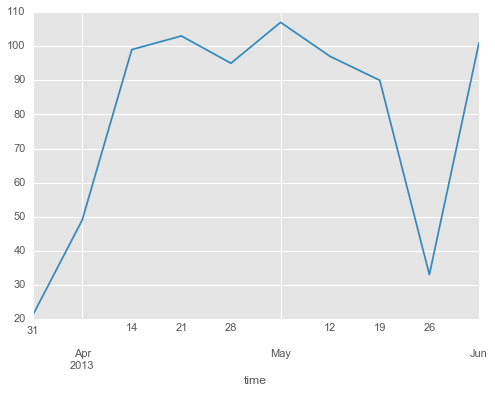

In [1359]:
deadlines = pd.read_csv(r'G:\Datasets\StudentLife\dataset\education\deadlines.csv')
deadlines = deadlines.reset_index(drop=True).set_index('uid').T.reset_index()
deadlines['time'] = pd.to_datetime(deadlines['index'])
deadlines = deadlines.set_index('time').drop('index',axis=1)
D = deadlines[:'2013-06-01'].sum(axis=1).resample('W',how='sum')
D.plot(color='#348ABD')

#### Grades

In [1370]:
grades = pd.read_csv(r'G:\Datasets\StudentLife\dataset\education\grades.csv')
grades.set_index('uid',inplace=True)
grades

,gpa all,gpa 13s,cs 65
uid,,,
u01,2.863,1.778,3.000
u02,3.505,4.000,4.000
u04,3.029,3.500,4.000
u05,3.679,3.778,4.000
u07,3.474,4.000,4.000
u08,3.705,3.333,4.000
u09,3.806,3.778,3.667
u10,3.667,3.778,4.000
u12,3.245,2.583,2.333


#### Extract Each File/EMA Question + Preprocess

In [ ]:
Questions = ['Social','Stress','Sleep','Exercise','Mood','Mood1','Mood2']


In [345]:
# EXERCISE
df = EMA_extractor('Exercise')

#Clean-up
Exercise_df = df
Exercise_df['have'] = Exercise_df['have'].replace('null',np.nan).astype(float)
Exercise_df['schedule'] = Exercise_df['schedule'].replace('null',np.nan).astype(float)
Exercise_df.drop('location',axis=1,inplace=True)
Exercise_df.set_index('resp_time',inplace=True)
Exercise_df = Exercise_df[Exercise_df.index < pd.to_datetime('2013-06-09')]

In [975]:
# STRESS
df = EMA_extractor('Stress')
df.drop(['location','null'],axis=1,inplace=True)
df.set_index('resp_time',inplace=True)
Stress_df = df

In [976]:
# SOCIAL
df = EMA_extractor('Social')
df.drop(['location','null'],axis=1,inplace=True)
df..set_index('resp_time',inplace=True)
Social_df = df

In [980]:
# SLEEP
df = EMA_extractor('Sleep')
df.drop(['location','null'],axis=1,inplace=True)
df.set_index('resp_time',inplace=True)
Sleep_df = df

In [375]:
# MOOD (2 binary questions on happy/sad, two scale 1-4)
df = EMA_extractor('Mood')
df.drop(['location'],axis=1,inplace=True)
df[['happyornot','sadornot']] = df[['happyornot','sadornot']].replace('null',np.nan).astype(float)
Mood_df = df

# MOOD 1 (How do you think you will be tomorrow?  1: Happy, 2: Stressed, 3: Tired)
df = EMA_extractor('Mood 1')
df.drop(['location'],axis=1,inplace=True)
Mood1_df = df

# MOOD 2 (Categorical: How are you right now? 1: Happy, 2: Stressed, 3: Tired)

df = EMA_extractor('Mood 2')
df.drop(['location','null'],axis=1,inplace=True)
Mood2_df = df

In [387]:
EMA_DFs = [Social_df,Stress_df,Sleep_df,Exercise_df,Mood_df,Mood1_df,Mood2_df]


### Location Data (Gym)

In [1303]:
East_Edge = np.array([43.703137, -72.282336])
West_Edge = np.array([43.702605, -72.284715])
North_Edge = np.array([43.703313, -72.284062])
South_Edge = np.array([43.702314, -72.283717])

gym_radius = np.sqrt(sum((West_Edge - East_Edge)**2))/4
gym_location = np.array([43.702927, -72.284007])

In [1304]:
def gps_extractor(file):
    student_id = file[-7:-4]
    
    gps = pd.read_csv(file,usecols=[0,4,5],header=0,index_col=False,parse_dates=['time'])
    gps['timestamp'] = pd.to_datetime(gps['time'].astype(int),unit='s')
    gps = gps.set_index('timestamp').drop('time',axis=1)
    gps['id'] = student_id

    return gps

In [1305]:

foldername = r'G:\Datasets\StudentLife\dataset\sensing\gps'
filenames = os.listdir(foldername)

# Create Initial Dataframe with first student
file = os.path.join(foldername,filenames[0])

#Function for reading in file
df = gps_extractor(file)

# Iterate over the rest of students
for filename in filenames[1:]:
    file = os.path.join(foldername,filename)

    df_student = gps_extractor(file)
    df = pd.concat([df,df_student])

GPS_df = df 

GPS_df['gym'] = (np.sqrt(np.sum((GPS_df[['latitude','longitude']].values - gym_location)**2,axis=1))<gym_radius).astype(int)

In [1377]:
gym_sum = GPS_df.groupby('id')['gym'].sum().sort_values(ascending=False)/6
gym_sum

id
u10   34.000
u25   24.667
u07   13.833
u57   10.667
u22    9.667
u05    8.667
u04    7.833
u16    7.000
u02    6.667
u58    6.167
u18    4.000
u08    3.833
u32    3.000
u46    2.000
u00    1.833
u09    1.667
u24    1.667
u52    1.667
u14    1.333
u15    1.000
u59    1.000
u53    0.833
u41    0.833
u20    0.833
u49    0.833
u19    0.667
u51    0.667
u30    0.500
u31    0.167
u54    0.167
u12    0.167
u13    0.000
u01    0.000
u56    0.000
u03    0.000
u50    0.000
u47    0.000
u33    0.000
u45    0.000
u34    0.000
u43    0.000
u17    0.000
u42    0.000
u23    0.000
u39    0.000
u36    0.000
u27    0.000
u35    0.000
u44    0.000
Name: gym, dtype: float64

In [1307]:
GPS_df.groupby('id').resample('W',how='sum')['gym'].unstack(level=1)

timestamp,2013-03-31 00:00:00,2013-04-07 00:00:00,2013-04-14 00:00:00,2013-04-21 00:00:00,2013-04-28 00:00:00,2013-05-05 00:00:00,2013-05-12 00:00:00,2013-05-19 00:00:00,2013-05-26 00:00:00,2013-06-02 00:00:00
id,,,,,,,,,,
u00,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,2.000,7.000
u01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
u02,0.000,6.000,7.000,12.000,1.000,11.000,3.000,0.000,0.000,0.000
u03,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan
u04,7.000,19.000,14.000,6.000,0.000,1.000,0.000,0.000,0.000,nan
u05,11.000,15.000,17.000,3.000,0.000,0.000,0.000,0.000,6.000,0.000
u07,30.000,31.000,3.000,7.000,2.000,10.000,0.000,0.000,nan,nan
u08,0.000,5.000,0.000,4.000,0.000,5.000,9.000,0.000,0.000,0.000
u09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10.000,0.000,0.000


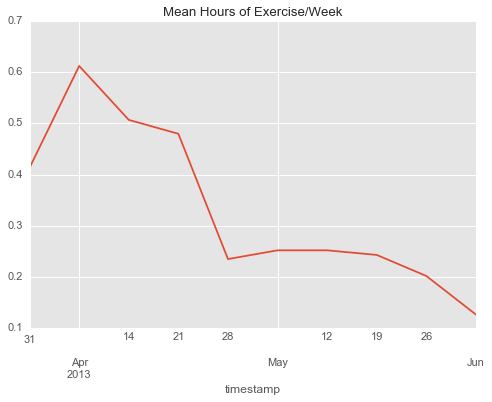

In [1341]:
(GPS_df.groupby('id').resample('W',how='sum')['gym'].unstack(level=1).mean()/6).plot()
plt.title('Mean Hours of Exercise/Week')

timestamp
2013-03-31     7
2013-04-07    15
2013-04-14    11
2013-04-21    14
2013-04-28     5
2013-05-05     7
2013-05-12     6
2013-05-19     7
2013-05-26     4
2013-06-02     4
dtype: int64

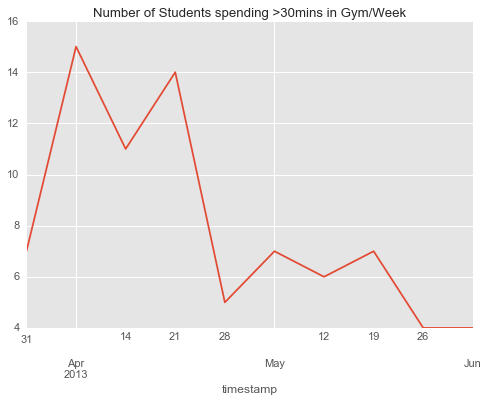

In [1355]:
A = (((GPS_df.groupby('id').resample('W',how='sum')['gym'].unstack(level=1))/6)>0.5).sum()
A.plot()
plt.title('Number of Students spending >30mins in Gym/Week')
A

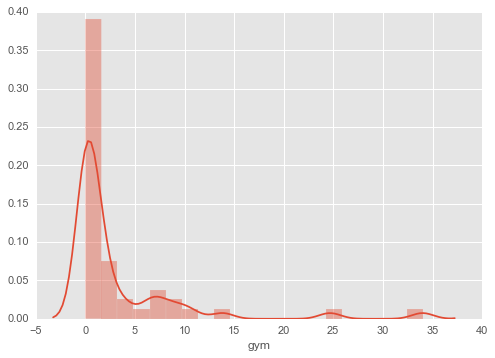

In [1309]:
sns.distplot(A)

In [1228]:
A.drop('u07',inplace=True)

In [1231]:
ex['mean']

id
u00   2.028
u01   1.000
u02   2.000
u03   1.875
u04   4.083
u07   2.385
u08   1.516
u10   1.700
u12   2.000
u14   1.000
u15   4.600
u16   1.868
u17   1.190
u18   2.600
u19   2.773
u20   2.667
u22   2.200
u23   1.294
u24   1.889
u25   4.000
u27   1.000
u30   1.667
u31   3.000
u32   1.360
u33   1.147
u34   1.667
u35   1.400
u36   2.458
u39   1.000
u41   3.000
u42   1.091
u43   1.000
u44   1.182
u45   1.143
u46   1.692
u47   1.333
u49   1.520
u50   2.000
u51   2.143
u52   1.000
u53   1.190
u54   3.000
u56   1.333
u57   2.438
u58   2.500
u59   1.139
Name: mean, dtype: float64

In [1233]:
Activity_df['Running_p'].corr(ex)

AttributeError: 'Series' object has no attribute 'columns'

In [1314]:
AA = pd.merge(pd.DataFrame(Activity_df['Running_p']),pd.DataFrame(ex['mean']),right_index=True,left_index=True)

In [1315]:
AA = AA.merge(pd.DataFrame(A),right_index=True,left_index=True)
AA.corr()

,Running_p,mean,gym
Running_p,1.000,-0.008,0.107
mean,-0.008,1.000,0.310
gym,0.107,0.310,1.000


In [1288]:
AA.head()

,Running_p,mean,gym
u10,0.007,1.700,34.000
u25,0.013,4.000,25.167
u02,0.001,2.000,19.833
u57,0.026,2.438,13.333
u22,0.013,2.200,10.833


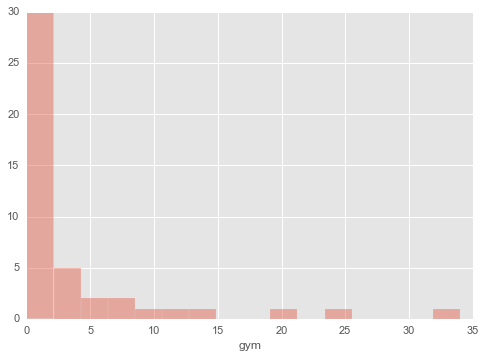

In [1310]:
sns.distplot(AA['gym'],kde=False)

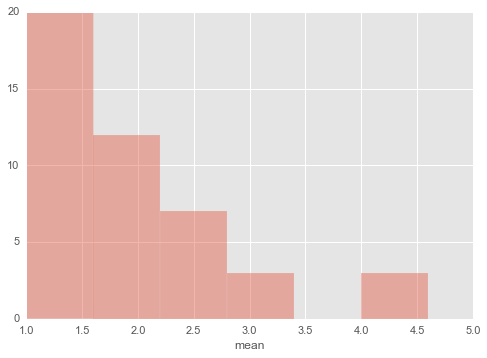

In [1311]:
sns.distplot(AA['mean'],kde=False)

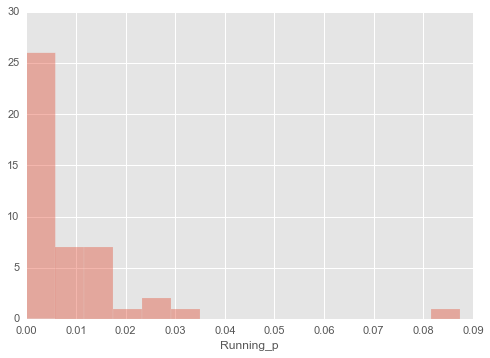

In [1312]:
sns.distplot(AA['Running_p'],kde=False)

### Activity Sensing (Totals)

In [612]:
def activities_totals(file):
    student_id = file[-7:-4]
    
    act = pd.read_csv(file,parse_dates=['timestamp'])
    act['timestamp'] = pd.to_datetime(act['timestamp'].astype(int),unit='s')
    act.set_index('timestamp',inplace=True)
    act.rename(columns={act.columns[0]:'activity_inference'},inplace=True)
    
    act = act['activity_inference'].astype("category")
    act5 = (pd.get_dummies(act).resample('5T',how='mean')>0.5).astype(int)

    
    act5.rename(index={0:student_id},columns={0:'Stationary',1:'Walking',2:'Running',3:'Unknown'},inplace=True)
    #act_totals_percent = act_totals.divide(act_totals.sum(axis=1),axis=0)
    
    return act5

In [612]:
def activities_totals(file):
    student_id = file[-7:-4]
    
    act = pd.read_csv(file,parse_dates=['timestamp'])
    act['timestamp'] = pd.to_datetime(act['timestamp'].astype(int),unit='s')
    act.set_index('timestamp',inplace=True)
    act.rename(columns={act.columns[0]:'activity_inference'},inplace=True)
    
    act = act['activity_inference'].astype("category")
    act5 = (pd.get_dummies(act).resample('5T',how='mean')>0.5).astype(int)

    act_totals = pd.DataFrame(act5.sum(axis=0)/12).T
    act_totals.rename(index={0:student_id},columns={0:'Stationary',1:'Walking',2:'Running',3:'Unknown'},inplace=True)
    #act_totals_percent = act_totals.divide(act_totals.sum(axis=1),axis=0)
    act_totals['hours_logged'] = act_totals.sum(axis=1)
    return act_totals

In [1113]:
def activities_weekly(file):
    student_id = file[-7:-4]
    
    act = pd.read_csv(file,parse_dates=['timestamp'])
    act['timestamp'] = pd.to_datetime(act['timestamp'].astype(int),unit='s')
    act.set_index('timestamp',inplace=True)
    act.rename(columns={act.columns[0]:'activity_inference'},inplace=True)
    
    act = act['activity_inference'].astype("category")
    act5 = (pd.get_dummies(act).resample('5T',how='mean')>0.5).astype(int)

    actW = act5.resample('W',how='sum')/12
    actW.rename(columns={0:'Stationary',1:'Walking',2:'Running',3:'Unknown'},inplace=True)
    actW['id'] = student_id
    actW
    
    return actW

In [613]:
foldername = r'G:\Datasets\StudentLife\dataset\sensing\activity'
filenames = os.listdir(foldername)

# Create Initial Dataframe with first student
file = os.path.join(foldername,filenames[0])

#Function for reading in file
df = activities_totals(file)

# Iterate over the rest of students
for filename in filenames[1:]:
    file = os.path.join(foldername,filename)

    df_student = activities_totals(file)
    df = pd.concat([df,df_student])

Activity_df = df    

foldername: G:\Datasets\StudentLife\dataset\sensing\activity


In [631]:
act_p = Activity_df[Activity_df.columns[0:4]].divide(Activity_df['hours_logged'],axis=0).rename(columns=lambda x: x+'_p')
Activity_df = pd.merge(act_p,Activity_df,left_index=True,right_index=True,how='outer')

In [633]:
Activity_df.head()

,Stationary_p,Walking_p,Running_p,Unknown_p,Stationary,Walking,Running,Unknown,hours_logged
u00,0.889,0.062,0.017,0.032,1203.500,84.000,22.917,43.167,1353.583
u01,0.945,0.034,0.017,0.004,1309.750,47.167,23.750,5.917,1386.583
u02,0.931,0.056,0.001,0.012,1437.167,85.833,1.000,19.083,1543.083
u03,0.986,0.011,0.001,0.002,1173.417,13.333,1.167,2.583,1190.500
u04,0.877,0.065,0.031,0.028,1171.500,86.833,40.750,36.750,1335.833


In [1114]:
foldername = r'G:\Datasets\StudentLife\dataset\sensing\activity'
filenames = os.listdir(foldername)

# Create Initial Dataframe with first student
file = os.path.join(foldername,filenames[0])

#Function for reading in file
df = activities_weekly(file)

# Iterate over the rest of students
for filename in filenames[1:]:
    file = os.path.join(foldername,filename)

    df_student = activities_weekly(file)
    df = pd.concat([df,df_student])

ActW_df = df  


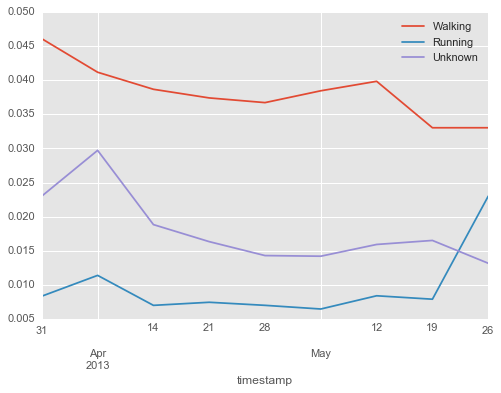

In [1142]:
A = ActW_df.resample('W',how='mean')[:'2013-06-01']
B = A.divide(A.sum(axis=1),axis=0).drop('Stationary',axis=1)
B.plot()

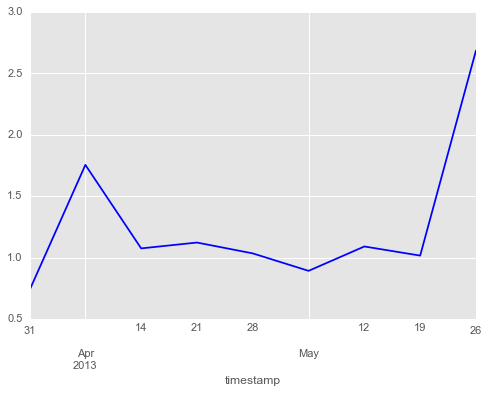

In [1145]:
ActW_df.resample('W',how='mean').loc[:'2013-06-01','Running'].plot(color='blue')

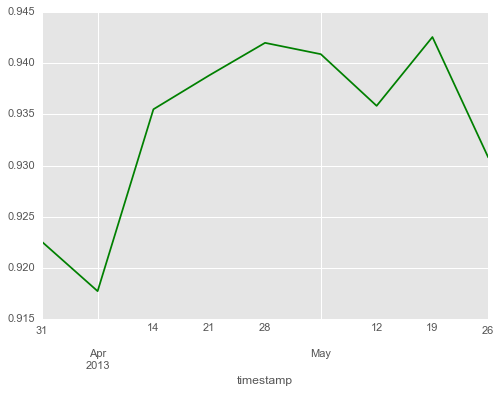

In [1139]:
A.divide(A.sum(axis=1),axis=0)['Stationary'].plot(color='green')

(45, 51)

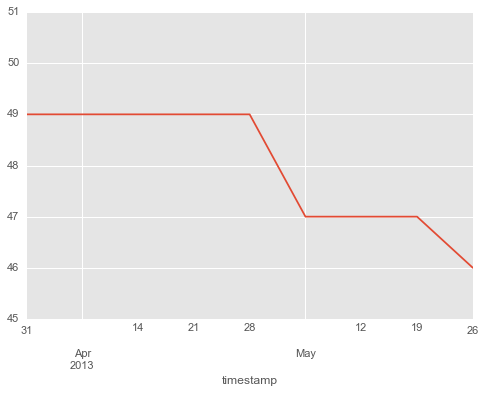

In [1131]:
ActW_df.resample('W',how='count').loc[:'2013-06-01','Running'].plot()
plt.ylim([45,51])

In [1144]:
B

,Walking,Running,Unknown
timestamp,,,
2013-03-31,0.046,0.008,0.023
2013-04-07,0.041,0.011,0.030
2013-04-14,0.039,0.007,0.019
2013-04-21,0.037,0.007,0.016
2013-04-28,0.037,0.007,0.014
2013-05-05,0.038,0.006,0.014
2013-05-12,0.040,0.008,0.016
2013-05-19,0.033,0.008,0.017
2013-05-26,0.033,0.023,0.013


In [650]:
Activity_df['Running_p'].corr(ex)

0.021465120808379142

## Examine Variables and Craft Feature Matrix
#### Distribution of Response, Count of Answers, Changes over Time

In [1420]:
Features = pd.DataFrame()
Features = Features.merge(grades,left_index=True,right_index=True,how='outer')
Features = Features.merge(pd.DataFrame(gym_sum),left_index=True,right_index=True,how='outer')
Features = Features.merge(pd.DataFrame(Activity_df['Running_p']),left_index=True,right_index=True,how='outer')

## Exercise

In [ ]:
ex_mean = Exercise_df.groupby('id').mean()['exercise']
ex_count = Exercise_df.groupby('id').count()['exercise']

In [698]:
ex = pd.DataFrame()
ex['mean'] = ex_mean
ex['count'] = ex_count
ex.describe()

,mean,count
count,46.000,46.000
mean,1.915,16.565
std,0.871,12.152
min,1.000,1.000
25%,1.190,8.000
50%,1.696,11.500
75%,2.424,24.750
max,4.600,44.000


In [694]:
ex.corr()

,mean,count
mean,1.000,-0.199
count,-0.199,1.000


Something of a negative correlation between number of times the exercise question was answered and average amount of exercise. Possibly because fewer values allows for a less common rare value to dominate.

Most students exercise a little - half the time no exercise, and half the time less than 30 mins, but some. Upper quartile does an average of some to 30-60 mins.

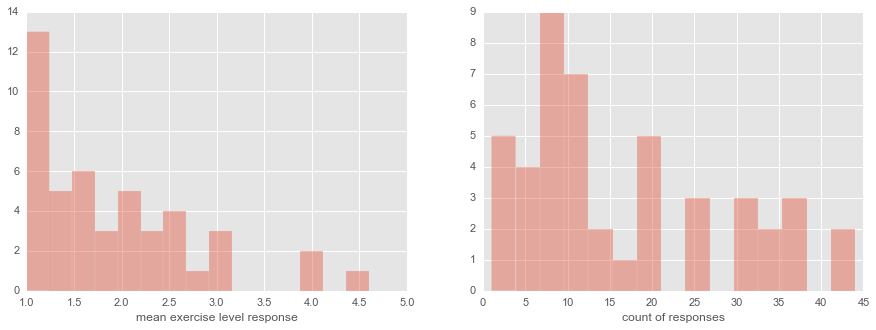

In [722]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.distplot(ex_mean,kde=False,bins=15,ax=ax1)
ax1.set_xlabel('mean exercise level response')
sns.distplot(ex_count,kde=False,bins=15,ax=ax2)
plt.xlabel('count of responses')

In [1469]:
A.

have                                                         \
resp_time 2013-04-07 2013-04-14 2013-04-21 2013-04-28 2013-05-05 2013-05-12   
id                                                                            
u00            5.000      0.000      0.000      1.000      1.000      0.000   
u01            0.000      0.000      0.000      0.000        nan        nan   
u02            2.000      0.000      1.000      1.000      0.000      1.000   
u03            0.000      1.000        nan      0.000      0.000      0.000   
u04            3.000      1.000      2.000      1.000      2.000      1.000   
u07            3.000      1.000      1.000      0.000        nan        nan   
u08            3.000      1.000      1.000      0.000      1.000      0.000   
u10            0.000      2.000      0.000      2.000      1.000      1.000   
u12            2.000      1.000        nan        nan        nan        nan   
u14            0.000      0.000      0.000        nan      0.000        nan   
u15              nan      3.000      2.000        nan        nan        nan   
u16            4.000      1.000      3.000      1.000      0.000      1.000   
u17            0.000      0.000      3.000      0.000      0.000      0.000   
u18            3.000      3.000      1.000        nan        nan        nan   
u19            3.000      5.000      5.000      3.000      3.000      2.000   
u20            0.000      0.000        nan        nan        nan        nan   
u22            3.000      3.000      4.000      1.000        nan      1.000   
u23            0.000      2.000      0.000      0.000        nan        nan   
u24            1.000      3.000      0.000        nan        nan        nan   
u25            3.000      1.000        nan      0.000        nan        nan   
u27            0.000        nan      0.000      0.000      0.000        nan   
u30            0.000      1.000      0.000      1.000        nan        nan   
u31            2.000        nan      1.000        nan        nan        nan   
u32            0.000      0.000      3.000      1.000      0.000      0.000   
u33            0.000      0.000      0.000      0.000      0.000      1.000   
u34            0.000        nan        nan      0.000        nan        nan   
u35            0.000      0.000      0.000      0.000        nan      1.000   
u36            0.000      0.000      0.000      0.000      2.000      0.000   
u39              nan      0.000      1.000      0.000        nan        nan   
u41            1.000        nan        nan        nan        nan        nan   
u42            0.000        nan        nan      0.000      0.000      0.000   
u43            0.000      0.000      0.000      0.000      0.000        nan   
u44            0.000      0.000      2.000      0.000      0.000      1.000   
u45            0.000        nan        nan      0.000        nan        nan   
u46            2.000      1.000      0.000      0.000      0.000        nan   
u47            0.000        nan      0.000      1.000      0.000        nan   
u49            1.000      0.000      0.000      0.000      2.000      1.000   
u50            1.000      0.000        nan        nan        nan        nan   
u51            0.000      0.000      0.000      0.000      0.000      0.000   
u52            0.000      0.000      0.000      0.000        nan        nan   
u53            1.000      0.000      1.000      1.000      0.000      0.000   
u54            1.000        nan        nan        nan      0.000        nan   
u56              nan      1.000      0.000      0.000        nan        nan   
u57            5.000      3.000      2.000      1.000      1.000      1.000   
u58            2.000      1.000      2.000      4.000      2.000      1.000   
u59            1.000      0.000      0.000      0.000      0.000        nan   

                                                       
resp_time 2013-05-19 2013-05-26 2013-06-02 2013-06-09  
id                              

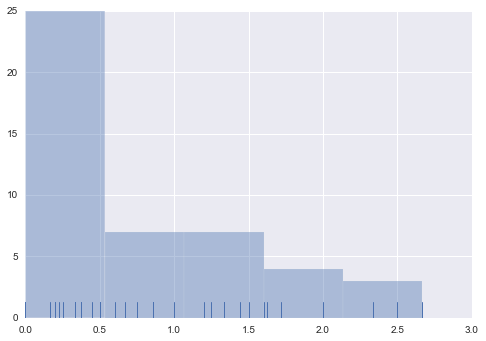

In [1484]:
sns.set(color_codes=True)

A = pd.DataFrame((Exercise_df['have']==1))
A['id'] = Exercise_df['id']
A = A.groupby('id').resample('W',how='sum').unstack(level=1).mean(axis=1)
sns.distplot(A,kde=False,bins=5,rug=True)

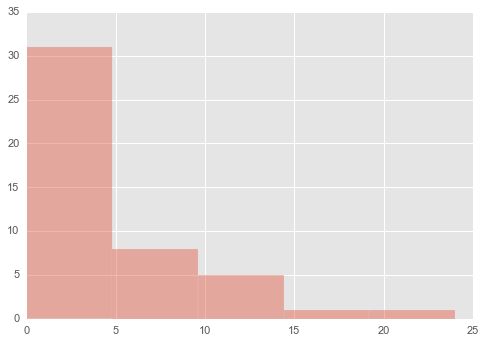

In [1473]:
A = pd.DataFrame((Exercise_df['have']==1))
A['id'] = Exercise_df['id']
A = A.groupby('id').sum()
sns.distplot(A,kde=False,bins=5)

In [1421]:

Ex_features = pd.DataFrame(ex[ex['count']>4]['mean']) #Remove where too few observations

In [1422]:
Features = Features.merge(Ex_features,left_index=True,right_index=True,how='outer')
Features.rename(columns={'mean':'exercise_mean'},inplace=True)

In [1260]:
Exercise_uw = Exercise_df.groupby('id').resample('W')
Social_uw = Social_df.groupby('id').resample('W')
Stress_uw = Stress_df.groupby('id').resample('W').drop('count',axis=1)
Sleep_uw = Sleep_df.groupby('id').resample('W')

In [1270]:
Features2 = Exercise_uw.merge(Social_uw,left_index=True,right_index=True,how='outer')
Features2 = Features2.merge(Stress_uw,left_index=True,right_index=True,how='outer')
Features2 = Features2.merge(Sleep_uw,left_index=True,right_index=True,how='outer')

In [1272]:
Features2.corr()

,exercise,have,schedule,walk,number,level,hour,rate,social
exercise,1.000,-0.818,0.083,0.204,-0.042,-0.036,0.051,-0.047,-0.135
have,-0.818,1.000,-0.182,-0.093,-0.035,0.102,-0.104,0.052,0.110
schedule,0.083,-0.182,1.000,-0.045,-0.104,-0.159,0.117,-0.117,-0.021
walk,0.204,-0.093,-0.045,1.000,0.231,0.111,-0.076,-0.037,-0.050
number,-0.042,-0.035,-0.104,0.231,1.000,-0.118,0.011,0.062,0.035
level,-0.036,0.102,-0.159,0.111,-0.118,1.000,-0.290,0.278,0.142
hour,0.051,-0.104,0.117,-0.076,0.011,-0.290,1.000,-0.456,-0.122
rate,-0.047,0.052,-0.117,-0.037,0.062,0.278,-0.456,1.000,0.214
social,-0.135,0.110,-0.021,-0.050,0.035,0.142,-0.122,0.214,1.000


## Stress

In [1407]:
Stress_df.tail(3)

,id,level,count
resp_time,,,
2013-06-05 01:09:43,u59,1.000,nan
2013-06-06 10:22:12,u59,1.000,nan
2013-06-07 23:46:27,u59,1.000,nan


In [977]:
Stress_df.replace(4,0,inplace=True)
Stress_df.replace(5,-1,inplace=True)
Stress_df['level'] += 1

In [753]:
stress = pd.DataFrame()
stress['mean'] = Stress_df.groupby('id').mean()['level']
stress['count'] = Stress_df.groupby('id').count()['level']
stress.describe()

,mean,count
count,48.000,49.000
mean,2.069,44.224
std,0.569,42.743
min,1.125,0.000
25%,1.662,19.000
50%,2.049,37.000
75%,2.428,56.000
max,3.857,269.000


In [760]:
stress.isnull().sum()

mean     1
count    0
dtype: int64

In [754]:
stress.corr()

,mean,count
mean,1.000,0.024
count,0.024,1.000


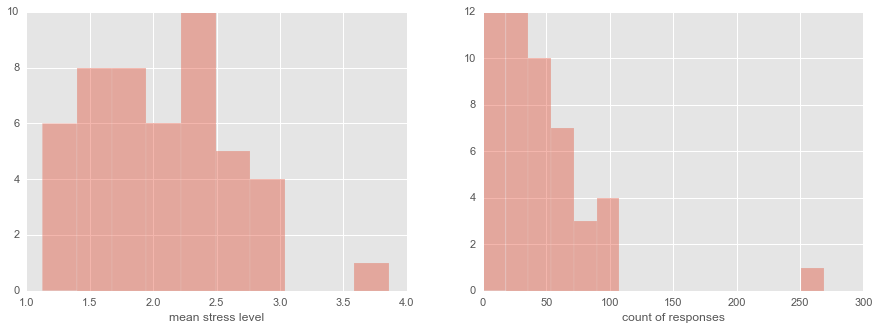

In [764]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.distplot(stress['mean'].dropna(),bins=10,kde=False,ax=ax1)
ax1.set_xlabel('mean stress level')
sns.distplot(stress['count'],bins=15,kde=False,ax=ax2)
plt.xlabel('count of responses')

In [775]:
stress_mean = pd.DataFrame()
stress_mean['stress_mean'] = stress['mean']

In [1423]:
Features = Features.merge(stress_mean,left_index=True,right_index=True,how='outer')

## Sleep

In [784]:
sleep = pd.DataFrame()
sleep['sleep_hours_mean'] = Sleep_df.groupby('id').mean()['hour']
sleep['sleep_quality_mean'] = Sleep_df.groupby('id').mean()['rate']
sleep['count'] = Sleep_df.groupby('id').count()['hour']
sleep.describe()

,sleep_hours_mean,sleep_quality_mean,count
count,49.000,49.000,49.000
mean,7.183,1.858,28.367
std,0.888,0.420,17.589
min,4.900,1.000,1.000
25%,6.805,1.571,14.000
50%,7.259,1.929,25.000
75%,7.787,2.106,40.000
max,9.286,2.710,73.000


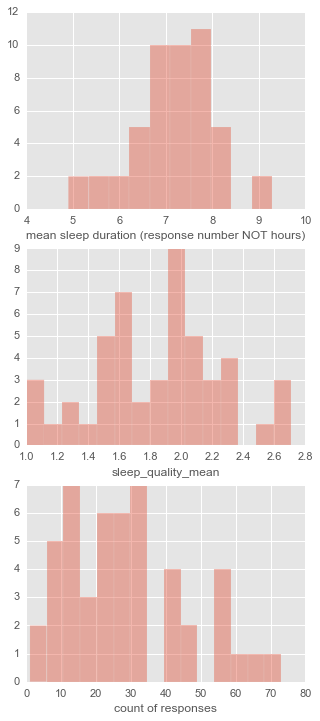

In [940]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(5,12))

sns.distplot(sleep['sleep_hours_mean'].dropna(),bins=10,kde=False,ax=ax1)
ax1.set_xlabel('mean sleep duration (response number NOT hours)')
sns.distplot(sleep['sleep_quality_mean'],bins=15,kde=False,ax=ax2)
plt.xlabel('mean sleep quality')
sns.distplot(sleep['count'],bins=15,kde=False,ax=ax3)
plt.xlabel('count of responses')


In [1424]:
Features = Features.merge(sleep[sleep['count']>5].drop('count',axis=1),left_index=True,right_index=True,how='outer')

## Social

In [792]:
people = pd.DataFrame()
people['number_interactions_mean'] = Social_df.groupby('id').mean()['number']
people['count'] = Social_df.groupby('id').count()['number']
people.describe()

,number_interactions_mean,count
count,48.000,49.000
mean,2.870,23.857
std,0.881,15.232
min,1.000,0.000
25%,2.270,13.000
50%,2.929,22.000
75%,3.443,32.000
max,4.444,79.000


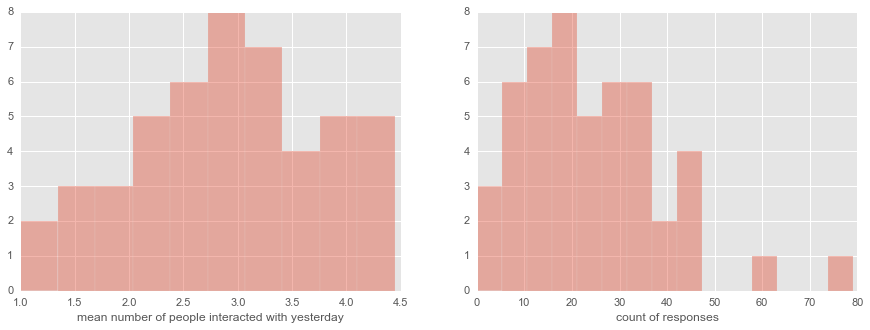

In [794]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.distplot(people['number_interactions_mean'].dropna(),bins=10,kde=False,ax=ax1)
ax1.set_xlabel('mean number of people interacted with yesterday')
sns.distplot(people['count'],bins=15,kde=False,ax=ax2)
plt.xlabel('count of responses')

In [1425]:
Features = Features.merge(pd.DataFrame(people[people['count']>4]['number_interactions_mean']),left_index=True,right_index=True,how='outer')

## Mood 2

In [812]:
#Mood2_df['how'] = Mood2_df['how'].astype("category")
mood = pd.get_dummies(Mood2_df,columns=['how']).groupby('id').sum()

In [817]:
mood_p = mood.divide(mood.sum(axis=1),axis=0)
mood_p['mood_count'] = mood.sum(axis=1)

In [820]:
mood_p.rename(columns={'how_1.0':'mood_happy','how_2.0':'mood_stressed','how_3.0':'mood_tired'},inplace=True)

In [1426]:
Features = Features.merge(mood_p,left_index=True,right_index=True,how='outer')

# Correlations

In [1427]:
Features.corr()

,gpa all,gpa 13s,cs 65,gym,Running_p,exercise_mean,stress_mean,sleep_hours_mean,sleep_quality_mean,number_interactions_mean,mood_happy,mood_stressed,mood_tired,mood_count
gpa all,1.000,0.553,0.528,-0.024,-0.515,-0.246,-0.154,0.030,0.134,-0.020,0.002,-0.136,0.240,0.060
gpa 13s,0.553,1.000,0.623,0.188,-0.702,0.160,-0.165,0.169,0.129,0.027,0.012,-0.143,0.233,0.123
cs 65,0.528,0.623,1.000,0.194,-0.734,0.177,-0.009,-0.025,0.433,0.331,-0.158,0.077,0.172,0.101
gym,-0.024,0.188,0.194,1.000,0.099,0.355,-0.153,0.167,0.091,0.183,-0.022,-0.034,0.111,0.009
Running_p,-0.515,-0.702,-0.734,0.099,1.000,0.022,0.081,0.001,-0.105,0.091,0.085,0.021,-0.215,-0.010
exercise_mean,-0.246,0.160,0.177,0.355,0.022,1.000,0.037,0.013,0.131,0.111,-0.128,0.089,0.085,-0.024
stress_mean,-0.154,-0.165,-0.009,-0.153,0.081,0.037,1.000,-0.359,0.395,-0.087,-0.510,0.410,0.269,-0.033
sleep_hours_mean,0.030,0.169,-0.025,0.167,0.001,0.013,-0.359,1.000,-0.473,0.025,0.064,0.057,-0.239,-0.171
sleep_quality_mean,0.134,0.129,0.433,0.091,-0.105,0.131,0.395,-0.473,1.000,0.163,-0.301,0.050,0.522,0.132
number_interactions_mean,-0.020,0.027,0.331,0.183,0.091,0.111,-0.087,0.025,0.163,1.000,0.092,-0.222,0.231,0.257


Seeing a number of expected correlations, which is nice: between sleep quality, length, stress. Rather week correlations with exercise.

In [1429]:
AA.corr()

,Running_p,mean,gym
Running_p,1.000,-0.008,0.107
mean,-0.008,1.000,0.310
gym,0.107,0.310,1.000


In [1431]:
AA

,Running_p,mean,gym
u10,0.007,1.700,34.000
u25,0.013,4.000,24.667
u07,0.011,2.385,13.833
u57,0.026,2.438,10.667
u22,0.013,2.200,9.667
u04,0.031,4.083,7.833
u16,0.003,1.868,7.000
u02,0.001,2.000,6.667
u58,0.005,2.500,6.167
u18,0.003,2.600,4.000


In [1430]:
Activity_df['Running_p']

u00   0.017
u01   0.017
u02   0.001
u03   0.001
u04   0.031
u05   0.002
u07   0.011
u08   0.013
u09   0.005
u10   0.007
u12   0.009
u13   0.007
u14   0.004
u15   0.001
u16   0.003
u17   0.003
u18   0.003
u19   0.000
u20   0.000
u22   0.013
u23   0.002
u24   0.008
u25   0.013
u27   0.002
u30   0.005
u31   0.003
u32   0.007
u33   0.004
u34   0.005
u35   0.008
u36   0.019
u39   0.000
u41   0.004
u42   0.002
u43   0.007
u44   0.001
u45   0.002
u46   0.026
u47   0.002
u49   0.002
u50   0.000
u51   0.017
u52   0.087
u53   0.001
u54   0.005
u56   0.007
u57   0.026
u58   0.005
u59   0.014
Name: Running_p, dtype: float64

In [1428]:
Features

,gpa all,gpa 13s,cs 65,gym,Running_p,exercise_mean,stress_mean,sleep_hours_mean,sleep_quality_mean,number_interactions_mean,mood_happy,mood_stressed,mood_tired,mood_count
u00,nan,nan,nan,1.833,0.017,2.028,2.189,7.109,1.982,2.955,0.800,0.000,0.200,15.000
u01,2.863,1.778,3.000,0.000,0.017,1.000,1.875,7.222,1.593,3.500,1.000,0.000,0.000,2.000
u02,3.505,4.000,4.000,6.667,0.001,2.000,1.933,7.923,2.000,2.800,0.500,0.250,0.250,4.000
u03,nan,nan,nan,0.000,0.001,1.875,1.517,8.071,1.714,1.550,0.000,1.000,0.000,3.000
u04,3.029,3.500,4.000,7.833,0.031,4.083,2.767,6.471,2.059,3.074,0.429,0.429,0.143,7.000
u05,3.679,3.778,4.000,8.667,0.002,nan,1.125,7.500,1.500,4.333,nan,nan,nan,nan
u07,3.474,4.000,4.000,13.833,0.011,2.385,1.226,7.042,2.000,3.250,nan,nan,nan,0.000
u08,3.705,3.333,4.000,3.833,0.013,1.516,2.667,7.000,1.902,2.767,0.143,0.571,0.286,7.000
u09,3.806,3.778,3.667,1.667,0.005,nan,1.333,nan,nan,nan,nan,nan,nan,nan
u10,3.667,3.778,4.000,34.000,0.007,1.700,1.679,7.787,2.106,3.133,0.364,0.364,0.273,11.000


In [1376]:
grades.corr()

,gpa all,gpa 13s,cs 65
gpa all,1.000,0.553,0.528
gpa 13s,0.553,1.000,0.623
cs 65,0.528,0.623,1.000


# Plots Over Time

In [994]:
Stress_df

,id,level
resp_time,,
2013-03-24 08:40:01,u00,nan
2013-03-24 08:40:58,u00,nan
2013-03-25 02:16:45,u00,nan
2013-03-25 00:00:18,u00,nan
2013-03-25 02:16:49,u00,nan
2013-03-25 18:54:56,u00,3.000
2013-03-26 03:33:26,u00,3.000
2013-03-26 03:33:34,u00,3.000
2013-03-27 01:12:20,u00,2.000


In [1050]:
Questions = [Exercise_df[['exercise','id']],Stress_df,Social_df,Sleep_df] #,Mood_df,Mood1_df,Mood2_df]
i = 1
Q = Questions[i]

Q = Q[:'2013-06-01']
Q.groupby('id').resample('W',how='count').unstack(level=1).count(axis=0)/Q.groupby('id').count().shape[0]

       resp_time 
level  2013-03-24   0.939
       2013-03-31   0.980
       2013-04-07   0.939
       2013-04-14   0.939
       2013-04-21   0.918
       2013-04-28   0.837
       2013-05-05   0.796
       2013-05-12   0.714
       2013-05-19   0.551
       2013-05-26   0.551
       2013-06-02   0.204
dtype: float64

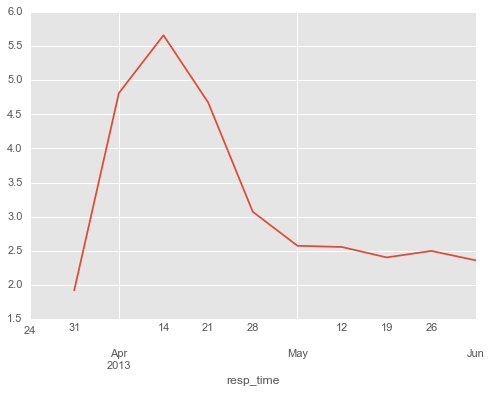

In [1020]:
Questions = [Exercise_df[['exercise','id']],Stress_df,Social_df,Sleep_df[['id','hour',]],Sleep_df[['id','rate']]] #,Mood_df,Mood1_df,Mood2_df]
i = 4
Q = Questions[i]

Q = Q[:'2013-06-01']
Qm = Q.groupby('id').resample('W',how='mean').unstack(level=1).mean().reset_index(level=0,drop=True)
#pd.rolling_mean(Qm,2).plot()
Qc = Q.groupby('id').resample('W',how='count').unstack(level=1).mean().reset_index(level=0,drop=True)
pd.rolling_mean(Qc,2).plot()
Qn = Q.groupby('id').count


In [1023]:
ax[0,1]

In [1317]:
Stress_df

,id,level,count
resp_time,,,
2013-03-24 08:40:01,u00,nan,nan
2013-03-24 08:40:58,u00,nan,nan
2013-03-25 02:16:45,u00,nan,nan
2013-03-25 00:00:18,u00,nan,nan
2013-03-25 02:16:49,u00,nan,nan
2013-03-25 18:54:56,u00,3.000,nan
2013-03-26 03:33:26,u00,3.000,nan
2013-03-26 03:33:34,u00,3.000,nan
2013-03-27 01:12:20,u00,2.000,nan


In [1034]:
ax1 = ax[0,0]
ax1.set_ylabel('hello')

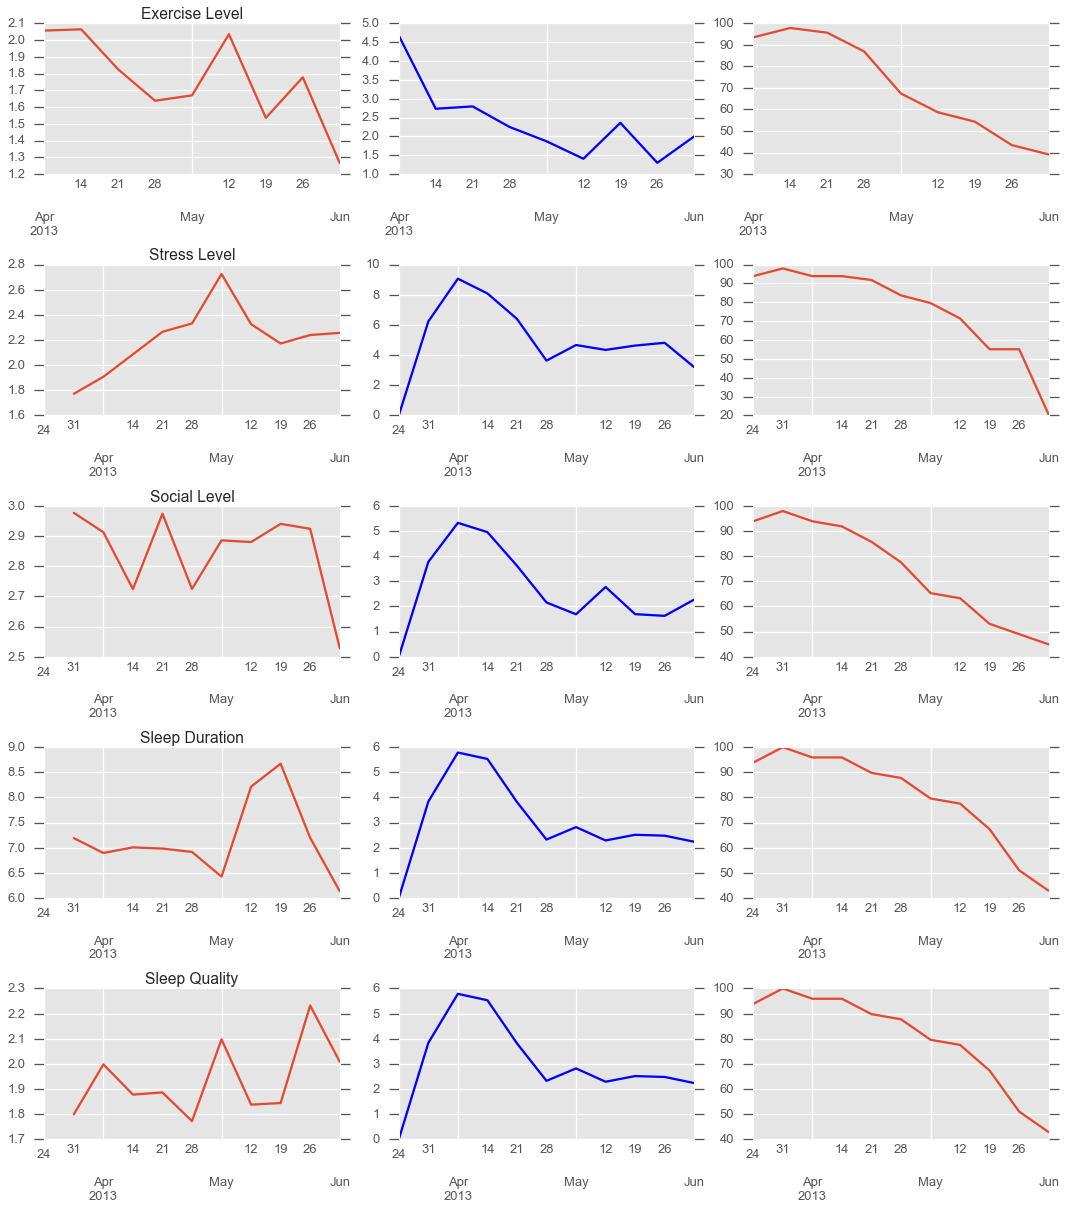

In [1662]:
Questions = [Exercise_df[['exercise','id']],Stress_df[['level','id']],Social_df,Sleep_df[['id','hour',]],Sleep_df[['id','rate']]] #,Mood_df,Mood1_df,Mood2_df]
ma = 1

n = len(Questions)
fig,ax = plt.subplots(n,3,figsize=(18,n*4))
fig.subplots_adjust(hspace=0.6)

for i in range(0,n):
    Q = Questions[i]
    Q = Q[:'2013-06-01']
    Qm = Q.groupby('id').resample('W',how='mean').unstack(level=1).mean().reset_index(level=0,drop=True)
    pd.rolling_mean(Qm,ma).plot(ax=ax[i,0])
    Qc = Q.groupby('id').resample('W',how='count').unstack(level=1).mean().reset_index(level=0,drop=True)
    pd.rolling_mean(Qc,ma).plot(ax=ax[i,1],color='blue')
    
    Qn = Q.groupby('id').resample('W',how='count').unstack(level=1).count().reset_index(level=0,drop=True)/Q.groupby('id').count().shape[0]*100
    Qn.plot(ax=ax[i,2])
    
    ax[i,0].set_xlabel('');
    ax[i,1].set_xlabel('');
    ax[i,2].set_xlabel('');

ax[0,0].set_title('Exercise Level');
ax[1,0].set_title('Stress Level');
ax[2,0].set_title('Social Level');
ax[3,0].set_title('Sleep Duration');
ax[4,0].set_title('Sleep Quality');



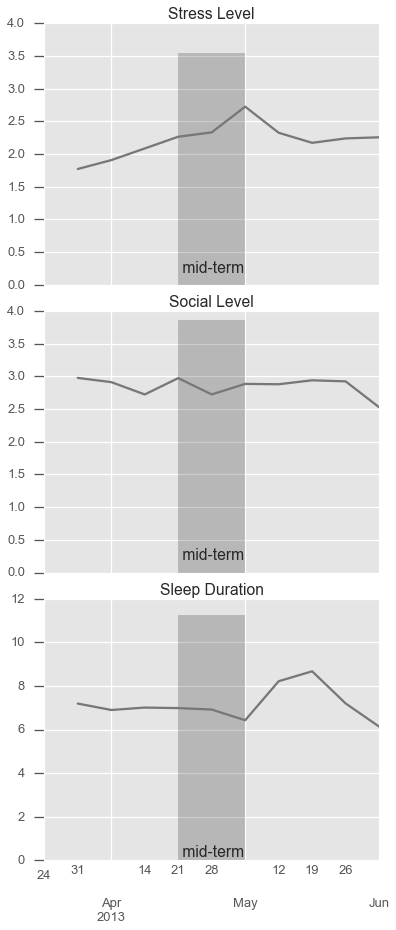

In [1590]:
Questions = [Stress_df[['level','id']],Social_df,Sleep_df[['id','hour',]]] #,Mood_df,Mood1_df,Mood2_df]
ma = 1

n = len(Questions)
fig,ax = plt.subplots(n,1,figsize=(6,n*5),sharex=True)
fig.subplots_adjust(hspace=0.1)

for i in range(0,n):
    Q = Questions[i]
    Q = Q[:'2013-06-01']
    Qm = Q.groupby('id').resample('W',how='mean').unstack(level=1).mean().reset_index(level=0,drop=True)
    Qm.plot(ax=ax[i],color=colors[3])
    
    ax[i].set_xlabel('');
    ax[i].fill_between([start,end],0,Qm.max()*1.3,facecolor='black', alpha = .2, interpolate=True)
    ax[i].text(start, 0.2,' mid-term')
    sns.despine()
    #ax[i].get_yaxis().set_ticks([])

ax[0].set_title('Stress Level');
ax[1].set_title('Social Level');
ax[2].set_title('Sleep Duration');




In [612]:
def activities_totals(file):
    student_id = file[-7:-4]
    
    act = pd.read_csv(file,parse_dates=['timestamp'])
    act['timestamp'] = pd.to_datetime(act['timestamp'].astype(int),unit='s')
    act.set_index('timestamp',inplace=True)
    act.rename(columns={act.columns[0]:'activity_inference'},inplace=True)
    
    act = act['activity_inference'].astype("category")
    act5 = (pd.get_dummies(act).resample('5T',how='mean')>0.5).astype(int)

    act_totals = pd.DataFrame(act5.sum(axis=0)/12).T
    act_totals.rename(index={0:student_id},columns={0:'Stationary',1:'Walking',2:'Running',3:'Unknown'},inplace=True)
    #act_totals_percent = act_totals.divide(act_totals.sum(axis=1),axis=0)
    act_totals['hours_logged'] = act_totals.sum(axis=1)
    return act_totalsc

## Activity Rates

In [1080]:
Activity_df

,Stationary_p,Walking_p,Running_p,Unknown_p,Stationary,Walking,Running,Unknown,hours_logged
u00,0.889,0.062,0.017,0.032,1203.500,84.000,22.917,43.167,1353.583
u01,0.945,0.034,0.017,0.004,1309.750,47.167,23.750,5.917,1386.583
u02,0.931,0.056,0.001,0.012,1437.167,85.833,1.000,19.083,1543.083
u03,0.986,0.011,0.001,0.002,1173.417,13.333,1.167,2.583,1190.500
u04,0.877,0.065,0.031,0.028,1171.500,86.833,40.750,36.750,1335.833
u05,0.943,0.034,0.002,0.021,1287.167,46.917,2.667,28.417,1365.167
u07,0.944,0.031,0.011,0.013,1063.667,35.167,12.500,15.000,1126.333
u08,0.932,0.049,0.013,0.006,1390.333,73.000,18.833,9.250,1491.417
u09,0.934,0.047,0.005,0.014,1329.833,67.500,6.583,20.083,1424.000
u10,0.956,0.031,0.007,0.006,1473.167,47.417,11.417,8.583,1540.583


# MORE INVESTIGATION

In [1072]:
Q = Exercise_df[['exercise','id']].groupby('id').mean()
Q['count'] = Exercise_df[['exercise','id']].groupby('id').count()
Q.corr()

,exercise,count
exercise,1.000,-0.199
count,-0.199,1.000


In [1076]:
Q0 = Stress_df
Q = Q0.groupby('id').mean()
Q['count'] = Q0.groupby('id').count()
Q.corr()

,level,count
level,1.000,0.024
count,0.024,1.000


In [1100]:
Q0 = Sleep_df[['id','hour',]]
Q = Q0.groupby('id').mean()
Q['count'] = Q0.groupby('id').count()
Q.corr()

,hour,count
hour,1.000,0.079
count,0.079,1.000


# REGRESSION MODEL

In [1245]:
Features

,exercise_mean,stress_mean,sleep_hours_mean,sleep_quality_mean,number_interactions_mean,mood_happy,mood_stressed,mood_tired,mood_count
id,,,,,,,,,
u00,2.028,2.189,7.109,1.982,2.955,0.800,0.000,0.200,15.000
u01,1.000,1.875,7.222,1.593,3.500,1.000,0.000,0.000,2.000
u02,2.000,1.933,7.923,2.000,2.800,0.500,0.250,0.250,4.000
u03,1.875,1.517,8.071,1.714,1.550,0.000,1.000,0.000,3.000
u04,4.083,2.767,6.471,2.059,3.074,0.429,0.429,0.143,7.000
u05,1.864,1.125,7.500,1.500,4.333,0.460,0.348,0.192,10.692
u07,2.385,1.226,7.042,2.000,3.250,0.460,0.348,0.192,0.000
u08,1.516,2.667,7.000,1.902,2.767,0.143,0.571,0.286,7.000
u10,1.700,1.679,7.787,2.106,3.133,0.364,0.364,0.273,11.000


In [834]:
Features = Features.drop(['u13','u09']).fillna(Features.mean()) #Handle Missing Values

In [826]:
Features.shape

(49, 9)

In [835]:
X = Features.drop('exercise_mean',axis=1)
y = Features['exercise_mean']

In [827]:
from sklearn.linear_model import LinearRegression


In [836]:
LR = LinearRegression()
LR.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [837]:
y_pred = LR.predict(X)

In [843]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(y,y_pred)

0.034719037122177943

In [845]:
np.sqrt(mean_squared_error(y,y_pred))

0.79382199121372132

In [852]:
Features.merge(pd.DataFrame(Activity_df['Running_p']),left_index=True,right_index=True).corr()

,exercise_mean,stress_mean,sleep_hours_mean,sleep_quality_mean,number_interactions_mean,mood_happy,mood_stressed,mood_tired,mood_count,Running_p
exercise_mean,1.000,0.034,0.011,0.125,0.105,-0.085,0.061,0.058,-0.023,0.022
stress_mean,0.034,1.000,-0.359,0.395,-0.087,-0.449,0.360,0.237,-0.031,0.074
sleep_hours_mean,0.011,-0.359,1.000,-0.473,0.025,0.058,0.051,-0.216,-0.155,0.001
sleep_quality_mean,0.125,0.395,-0.473,1.000,0.163,-0.265,0.044,0.458,0.117,-0.105
number_interactions_mean,0.105,-0.087,0.025,0.163,1.000,0.074,-0.178,0.186,0.210,0.091
mood_happy,-0.085,-0.449,0.058,-0.265,0.074,1.000,-0.874,-0.392,-0.062,0.083
mood_stressed,0.061,0.360,0.051,0.044,-0.178,-0.874,1.000,-0.105,-0.078,0.021
mood_tired,0.058,0.237,-0.216,0.458,0.186,-0.392,-0.105,1.000,0.273,-0.209
mood_count,-0.023,-0.031,-0.155,0.117,0.210,-0.062,-0.078,0.273,1.000,-0.009
Running_p,0.022,0.074,0.001,-0.105,0.091,0.083,0.021,-0.209,-0.009,1.000


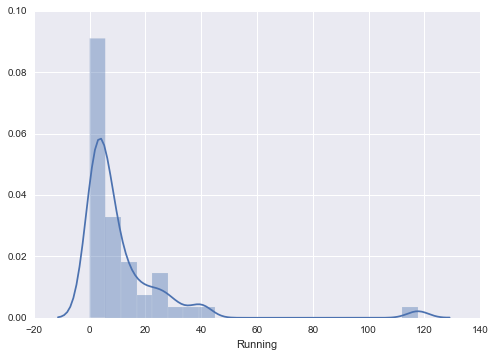

In [1487]:
sns.distplot(Activity_df['Running'])

In [1504]:
A.sort_values()

id
u39    0.000
u50    0.008
u20    0.056
u19    0.075
u15    0.092
u02    0.100
u53    0.125
u03    0.130
u45    0.150
u44    0.150
u47    0.208
u42    0.241
u23    0.250
u05    0.267
u27    0.292
u49    0.317
u18    0.333
u41    0.375
u34    0.417
u16    0.450
u17    0.450
u33    0.450
u54    0.492
u31    0.500
u14    0.550
u09    0.658
u58    0.667
u30    0.675
u43    0.808
u13    0.867
u25    0.867
u32    0.892
u56    0.908
u10    1.142
u24    1.217
u35    1.275
u12    1.425
u07    1.562
u22    1.642
u59    1.883
u08    1.883
u00    2.292
u01    2.375
u51    2.642
u36    2.783
u46    3.519
u57    3.875
u04    4.528
u52   11.767
dtype: float64

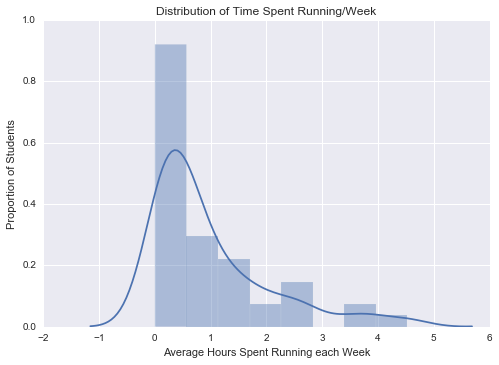

In [1508]:
A = ActW_df.set_index('id',append=True)['Running'].unstack(level=0).mean(axis=1)
sns.distplot(A.drop('u52')) #Outlier
plt.title('Distribution of Time Spent Running/Week')
plt.xlabel('Average Hours Spent Running each Week')
plt.ylabel('Proportion of Students')

In [1493]:
Activity_df.sort_values(by='Running_p',ascending=True)

,Stationary_p,Walking_p,Running_p,Unknown_p,Stationary,Walking,Running,Unknown,hours_logged
u39,0.994,0.003,0.000,0.003,469.417,1.417,0.000,1.500,472.333
u50,0.963,0.017,0.000,0.020,793.333,13.667,0.083,16.750,823.833
u20,0.971,0.023,0.000,0.005,995.417,24.000,0.500,5.333,1025.250
u19,0.951,0.035,0.000,0.013,1455.250,53.417,0.750,20.250,1529.667
u02,0.931,0.056,0.001,0.012,1437.167,85.833,1.000,19.083,1543.083
u53,0.965,0.022,0.001,0.012,1336.833,30.917,1.250,16.417,1385.417
u03,0.986,0.011,0.001,0.002,1173.417,13.333,1.167,2.583,1190.500
u44,0.977,0.014,0.001,0.007,1331.167,19.667,1.500,9.500,1361.833
u15,0.931,0.034,0.001,0.034,667.333,24.583,0.917,24.083,716.917
u23,0.977,0.018,0.002,0.003,1316.167,24.000,2.250,4.500,1346.917


In [1542]:
A

timestamp,2013-03-31 00:00:00,2013-04-07 00:00:00,2013-04-14 00:00:00,2013-04-21 00:00:00,2013-04-28 00:00:00,2013-05-05 00:00:00,2013-05-12 00:00:00,2013-05-19 00:00:00,2013-05-26 00:00:00,2013-06-02 00:00:00
id,,,,,,,,,,
u00,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,2.000,7.000
u01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
u02,0.000,6.000,7.000,12.000,1.000,11.000,3.000,0.000,0.000,0.000
u03,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan
u04,7.000,19.000,14.000,6.000,0.000,1.000,0.000,0.000,0.000,nan
u05,11.000,15.000,17.000,3.000,0.000,0.000,0.000,0.000,6.000,0.000
u07,30.000,31.000,3.000,7.000,2.000,10.000,0.000,0.000,nan,nan
u08,0.000,5.000,0.000,4.000,0.000,5.000,9.000,0.000,0.000,0.000
u09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10.000,0.000,0.000


In [1549]:
A = GPS_df.groupby('id')['gym'].resample('W',how='sum').unstack(level=1)
A[A>10]=np.nan #Clean
A

Flushing oldest 200 entries.


timestamp,2013-03-31 00:00:00,2013-04-07 00:00:00,2013-04-14 00:00:00,2013-04-21 00:00:00,2013-04-28 00:00:00,2013-05-05 00:00:00,2013-05-12 00:00:00,2013-05-19 00:00:00,2013-05-26 00:00:00,2013-06-02 00:00:00
id,,,,,,,,,,
u00,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,2.000,7.000
u01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
u02,0.000,6.000,7.000,nan,1.000,nan,3.000,0.000,0.000,0.000
u03,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan
u04,7.000,nan,nan,6.000,0.000,1.000,0.000,0.000,0.000,nan
u05,nan,nan,nan,3.000,0.000,0.000,0.000,0.000,6.000,0.000
u07,nan,nan,3.000,7.000,2.000,10.000,0.000,0.000,nan,nan
u08,0.000,5.000,0.000,4.000,0.000,5.000,9.000,0.000,0.000,0.000
u09,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10.000,0.000,0.000


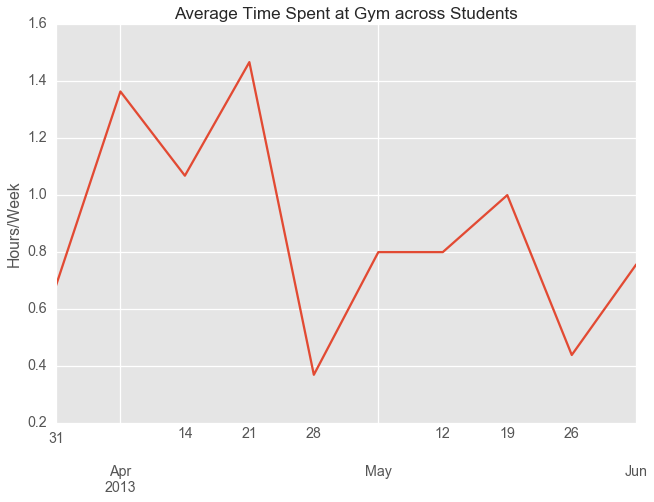

In [1565]:
A.mean().plot()
plt.title('Average Time Spent at Gym across Students')
plt.ylabel('Hours/Week')
plt.xlabel('')

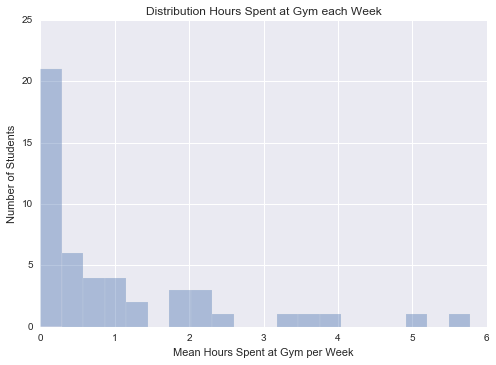

In [1558]:
A = GPS_df.groupby('id')['gym'].resample('W',how='sum').unstack(level=1)
A[A>10]=np.nan #Clean
sns.distplot(A.mean(axis=1),bins=20,kde=False)
plt.title('Distribution Hours Spent at Gym each Week')
plt.xlabel('Mean Hours Spent at Gym per Week')
plt.ylabel('Number of Students')

In [1525]:
A.mean(axis=1)

id
u00    1.100
u01    0.000
u02    4.000
u03    0.000
u04    5.222
u05    5.200
u07   10.375
u08    2.300
u09    1.000
u10   20.400
u12    0.100
u13    0.000
u14    0.800
u15    0.600
u16    4.200
u17    0.000
u18    2.400
u19    0.400
u20    0.625
u22    5.800
u23    0.000
u24    2.000
u25   14.800
u27    0.000
u30    0.300
u31    0.100
u32    2.250
u33    0.000
u34    0.000
u35    0.000
u36    0.000
u39    0.000
u41    0.500
u42    0.000
u43    0.000
u44    0.000
u45    0.000
u46    1.333
u47    0.000
u49    0.500
u50    0.000
u51    0.400
u52    1.000
u53    0.500
u54    0.125
u56    0.000
u57    6.400
u58    3.700
u59    0.600
dtype: float64

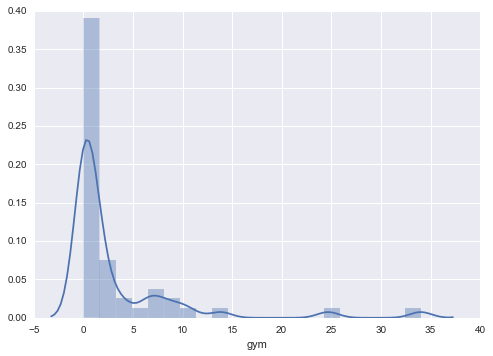

In [1511]:
sns.distplot(gym_sum)

In [1520]:
gym_sum

id
u10   34.000
u25   24.667
u07   13.833
u57   10.667
u22    9.667
u05    8.667
u04    7.833
u16    7.000
u02    6.667
u58    6.167
u18    4.000
u08    3.833
u32    3.000
u46    2.000
u00    1.833
u09    1.667
u24    1.667
u52    1.667
u14    1.333
u15    1.000
u59    1.000
u53    0.833
u41    0.833
u20    0.833
u49    0.833
u19    0.667
u51    0.667
u30    0.500
u31    0.167
u54    0.167
u12    0.167
u13    0.000
u01    0.000
u56    0.000
u03    0.000
u50    0.000
u47    0.000
u33    0.000
u45    0.000
u34    0.000
u43    0.000
u17    0.000
u42    0.000
u23    0.000
u39    0.000
u36    0.000
u27    0.000
u35    0.000
u44    0.000
Name: gym, dtype: float64

In [1616]:
resp = pd.concat([Mood_df['id'],Social_df['id'],Exercise_df['id'],Stress_df['id']])

In [1604]:
Mood_df.set_index('resp_time',inplace=True)

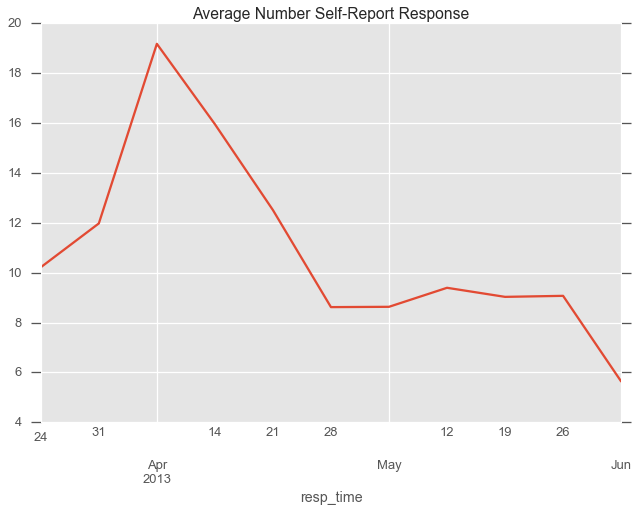

In [1627]:
resp = pd.concat([Mood_df['id'],Social_df['id'],Exercise_df['id'],Stress_df['id']])
resp = pd.DataFrame(resp)
resp['dummy']=1
resp[:semester_end].groupby('id').resample('W',how='sum')['dummy'].unstack(level=1).mean().plot()

plt.title('Average Number Self-Report Response')

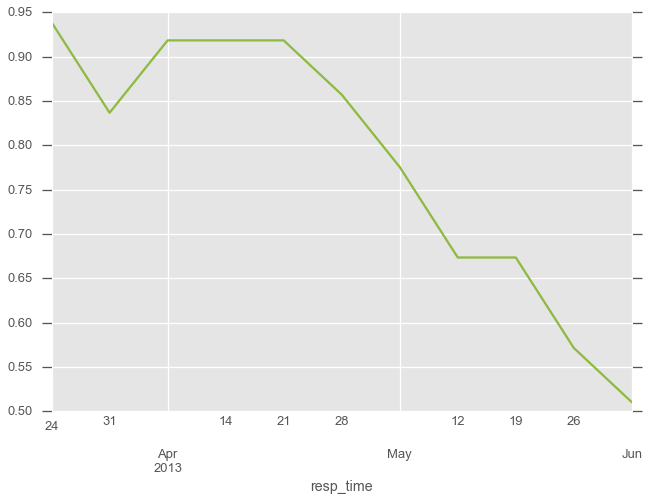

In [1650]:
resp = pd.concat([Mood_df['id'],Social_df['id'],Exercise_df['id'],Stress_df['id']])
resp = pd.DataFrame(resp)
resp['dummy']=1
n = resp.groupby('id').count().shape[0]
R = resp[:semester_end].groupby('id').resample('W',how='sum')['dummy'].unstack(level=1).count(axis=0)/n
R.plot(color=colors[5]);

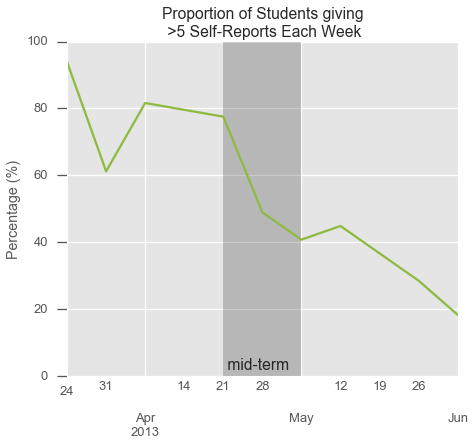

In [1661]:
resp = pd.concat([Mood_df['id'],Social_df['id'],Exercise_df['id'],Stress_df['id']])
resp = pd.DataFrame(resp)
resp['dummy']=1
n = resp.groupby('id').count().shape[0]
R = resp[:semester_end].groupby('id').resample('W',how='sum')['dummy'].unstack(level=1)#.count(axis=0)/n
R = R[R>5].count(axis=0)/n*100

fig,ax = plt.subplots(figsize=(7,6))

R.plot(color=colors[5]);

plt.title('Proportion of Students giving\n >5 Self-Reports Each Week')
plt.xlabel('')
plt.ylabel('Percentage (%)')

ax.fill_between([start,end],0,100,facecolor='black', alpha = .2, interpolate=True)
ax.text(start, 2,' mid-term')
sns.despine()

49